In [52]:
import math
import random
import copy
import time
import numpy as np
import matplotlib.pyplot as plt


# Função para obter a representação computacional do tabuleiro aleatoriamente

In [53]:
def getRandomBoard(dimension:int):
    """Retorna um array que representa o tabuleiro (dimension x dimension) no qual cada coluna tem uma rainha posicionada.

    Representação Array 8x8: [2, 0, 4, 1, 6, 7, 3, 5] 

    Representação tabuleiro:

      0 . R . . . . . .
      1 . . . R . . . .
      2 R . . . . . . .
      3 . . . . . . R .
      4 . . R . . . . .
      5 . . . . . . . R
      6 . . . . R . . .
      7 . . . . . R . .
        0 1 2 3 4 5 6 7
    """
    board = [random.randint(0, 7) for _ in range(8)]
    # board = random.sample(range(0, dimension), k=dimension)
    return board
    

# Classe para definir o estado do tabuleiro

In [54]:
class BoardState:
    """ Define o estado. Cada coluna tem apenas uma rainha em cada estado."""

    def __init__(self, board:list) -> None:
        self.board = board
        self.dimension = len(self.board)
        self.horizontalConflictDict = {}
        self.mainDiagonalsConflictDict = {}
        self.secondaryDiagonalsConflictDict = {}
        self.heuristic = 0
        self.setConflictDictionaries()
        self.setHeuristic()
    
    
    def setConflictDictionaries(self) -> None:
        """Define 3 dicionários, que representam o número de rainhas:
            em cada linha -> horizontalConflictDict; 
            cada diagonal principal -> mainDiagonalsConflictDict;
            e cada diagonal secundária -> secondaryDiagonalsConflictDict
        Ex.: secondaryDiagonalsConflictDict[i] = k indica que existem k rainhas na i-ésima linha
        Obs.: 
            Diagonais Principais: a diferença entre os índices das linhas e das colunas é sempre igual na mesma diagonal
            Diagonais secundárias: a soma dos índices das linhas e das colunas é sempre igual na mesma diagonal
        """
        for j, i in enumerate(self.board):
                self.horizontalConflictDict[i] = self.horizontalConflictDict[i] + 1 if i in self.horizontalConflictDict else 1
                self.mainDiagonalsConflictDict[i-j] =  self.mainDiagonalsConflictDict[i-j] + 1 if i-j in self.mainDiagonalsConflictDict else 1
                self.secondaryDiagonalsConflictDict[i+j] =  self.secondaryDiagonalsConflictDict[i+j] + 1 if i+j in self.secondaryDiagonalsConflictDict else 1


    def setHeuristic(self) -> None:
        """Define a heurística de um estado. Essa heurística é o número de pares de rainhas que estão atacando uma a outra (Combinaçào de n elementos tomados 2 a 2)"""
        for boardLineIndex in self.horizontalConflictDict:
             if self.horizontalConflictDict[boardLineIndex] > 1:
                  self.heuristic += math.comb(self.horizontalConflictDict[boardLineIndex], 2)

        for boardMainDiagonalIndex in self.mainDiagonalsConflictDict:
             if self.mainDiagonalsConflictDict[boardMainDiagonalIndex] > 1:
                  self.heuristic += math.comb(self.mainDiagonalsConflictDict[boardMainDiagonalIndex], 2)

        for boardSecondaryDiagonalIndex in self.secondaryDiagonalsConflictDict:
             if self.secondaryDiagonalsConflictDict[boardSecondaryDiagonalIndex] > 1:
                  self.heuristic += math.comb(self.secondaryDiagonalsConflictDict[boardSecondaryDiagonalIndex], 2)


    def getRandomSuccessor(self) -> 'BoardState':
        """retorna um sucessor aleatório do estado atual"""
        j = random.randrange(0, self.dimension)
        possiblePositions = [i for i in range(self.dimension) if i != self.board[j]]
        i = random.choice(possiblePositions)

        newBoard = copy.deepcopy(self.board)
        newBoard[j] = i
        return BoardState(newBoard)
    

# Função que executa o Simulated Annealing baseado no estado inicial do tabuleiro

In [55]:
def runSimulatedAnnealing(boardState: BoardState, temperature:int=90000, temperatureDecay:int=0.8, maxNumImprovement:int=500) -> tuple:
    """Obtém o estado inicial do tabuleiro e executa o algoritmo Simulated Annealling"""
    currentState = BoardState(boardState)
    numImprovementCount = 0
    # print("Iniciando Simulated Annealing")
    # print("Estado atual do tabuleiro:")
    # print(currentState.board)
    # print(f"Heurística do estado atual: {currentState.heuristic}")
    # print(f"{'='*50}")
    NIterations= 0
    while True:
        NIterations+=1
        temperature *= temperatureDecay
        if temperature < 1 or numImprovementCount >= maxNumImprovement:
            # print("Estado final do tabuleiro: ")
            # print(currentState.board)
            # print(f"Heurística do estado final: {currentState.heuristic}")
            # print(f"temperatura: {temperature}")
            # print(f"contador de melhorias: {numImprovementCount}")
            if currentState.heuristic == 0:
                # print("\n\033[1;32mO Simulated Annealing encontrou a solução ótima global\033[m")
                return True, currentState,NIterations
            else:
                # print("\n\033[1;31mO Simulated Annealing não conseguiu encontrar a solução ótima global\033[m")
                return False, currentState,NIterations
            
        nextState = currentState.getRandomSuccessor()
        deltaE = nextState.heuristic - currentState.heuristic
        if deltaE < 0: #minimização
            # print("Movimentação realizada:")
            # print(f"{currentState.board} ---> {nextState.board}")
            # print("Estado atual do tabuleiro:")
            # print(currentState.board)
            # print(f"Heurística do estado atual: {currentState.heuristic}")
            # print(f"{'='*50}")
            currentState = nextState
            numImprovementCount = 0
        else:
            randomDecision = random.uniform(0, 1)
            probability = math.exp(deltaE/temperature)
            if randomDecision >= probability:
                # print("Movimentação realizada:")
                # print(f"{currentState.board} ---> {nextState.board}")
                # print("Estado atual do tabuleiro:")
                # print(currentState.board)
                # print(f"Heurística do estado atual: {currentState.heuristic}")
                # print(f"{'='*50}")
                currentState = nextState
                numImprovementCount = 0 # reseta o contador se a mudança for aceita
            else:
                numImprovementCount += 1 # incrementa o contador se não houver melhoria

# Execução

In [56]:
randomBoard = getRandomBoard(dimension=8)
solution = runSimulatedAnnealing(boardState=randomBoard)
print(f"\033[0;39mAchou solução ótima? {solution[0]}")
print(f"Estado final do tabuleiro: {solution[1].board}")
print(f"Heurística final: {solution[1].heuristic}")
print(f"Número de Iterações {solution[2]}")



Achou solução ótima? False
Estado final do tabuleiro: [5, 1, 4, 0, 2, 6, 7, 3]
Heurística final: 2
Número de Iterações 52


# Exercício

#### Execute o algoritmo 50 vezes e calcule: média e desvio padrão do número mínimo de iterações necessário para parar o algoritmo; média e desvio padrão do tempo de execução do algoritmo

In [60]:
# Listas 
iterationsList = []
time_execList = []
bestsList = []

# Executar o algoritmo 50 vezes
for _ in range(50):
    
    start = time.perf_counter()  # Início da contagem do tempo
    
    ##execução 
    randomBoard = getRandomBoard(dimension=8)
    solution = runSimulatedAnnealing(boardState=randomBoard)
    end = time.perf_counter()  # Fim da contagem do tempo
    nIterations= solution[2]
    if solution[0]:
        bestsList.append(solution)
    # Calcula o tempo de execução e armazena os resultados
    tExec= end - start
    iterationsList.append(nIterations)
    time_execList.append(tExec)


# Cálculo da média e desvio padrão
media_iteracoes = np.mean(iterationsList)
desvio_padrao_iteracoes = np.std(iterationsList)

media_tempo = np.mean(time_execList)
desvio_padrao_tempo = np.std(time_execList)

# Exibir resultados
print(f"Média de iterações: {media_iteracoes}")
print(f"Desvio padrão de iterações: {desvio_padrao_iteracoes}")
print(f"Média de tempo de execução: {media_tempo} segundos")
print(f"Desvio padrão de tempo de execução: {desvio_padrao_tempo} segundos")

print(f"Melhores 5 soluções")
if len(bestsList) > 0:
    for i,solution in enumerate(bestsList):
        print(f"\n{i+1}°: \n")
        print(f"\033[0;39mAchou solução ótima? {solution[0]}")
        print(f"Estado final do tabuleiro: {solution[1].board}")
        print(f"Heurística final: {solution[1].heuristic}")
        print(f"Número de Iterações {solution[2]}")

Média de iterações: 52.0
Desvio padrão de iterações: 0.0
Média de tempo de execução: 0.001033562000375241 segundos
Desvio padrão de tempo de execução: 0.00039809661263600005 segundos
Melhores 5 soluções

1°: 

Achou solução ótima? True
Estado final do tabuleiro: [3, 7, 4, 2, 0, 6, 1, 5]
Heurística final: 0
Número de Iterações 52


## Gráfico - Tempo de execução e iterações por execução

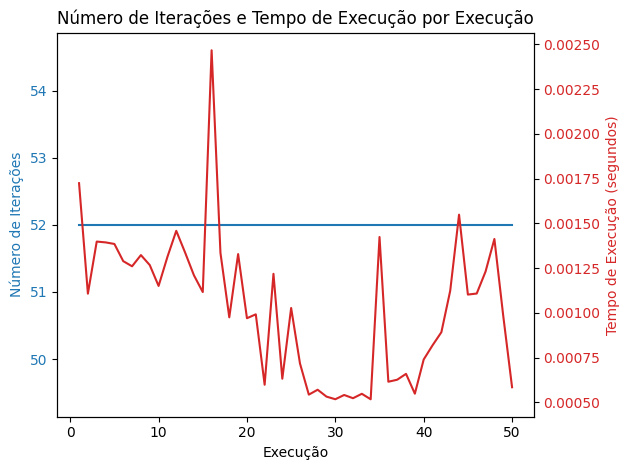

In [61]:
# Gráfico mostrando número de iterações por execução e tempo de execução

executions = np.arange(1, 51)  # Eixo x, de 1 a 50

fig, ax1 = plt.subplots()

# Gráfico de número de iterações (à esquerda)
ax1.set_xlabel('Execução')
ax1.set_ylabel('Número de Iterações', color='tab:blue')
ax1.plot(executions, iterationsList, color='tab:blue', label='Iterações')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Criar um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()
ax2.set_ylabel('Tempo de Execução (segundos)', color='tab:red')
ax2.plot(executions, time_execList , color='tab:red', label='Tempo de Execução')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título do gráfico
plt.title('Número de Iterações e Tempo de Execução por Execução')

# Exibir gráfico
fig.tight_layout()  # Para ajustar bem o layout
plt.show()

## Código alterado pra armazenar os 5 melhores resultados

In [63]:

# Listas  
iterationsList = []
time_execListList = []
bestsList = []
nItAlg= 0 # número de iterações pra achar as 5 melhores 
# Executar o algoritmo 50 vezes
while len(bestsList)<5:
    nItAlg+=1
    begin = time.perf_counter()  # Início da contagem do tempo
    
    ##execução 
    randomBoard = getRandomBoard(dimension=8)
    solution = runSimulatedAnnealing(boardState=randomBoard)
    end = time.perf_counter()  # Fim da contagem do tempo
    nIterations= solution[2]
    if solution[0]:
        bestsList.append(solution)
    # Calcula o tempo de execução e armazena os resultados
    t_execucao= end - begin
    iterationsList.append(nIterations)
    time_execList.append(t_execucao)


# Cálculo da média e desvio padrão
media_iteracoes = np.mean(iterationsList)
desvio_padrao_iteracoes = np.std(iterationsList)

media_tempo = np.mean(time_execList)
desvio_padrao_tempo = np.std(time_execList)

# Exibir resultados
print(f"Média de iterações: {media_iteracoes}")
print(f"Desvio padrão de iterações: {desvio_padrao_iteracoes}")
print(f"Média de tempo de execução: {media_tempo} segundos")
print(f"Desvio padrão de tempo de execução: {desvio_padrao_tempo} segundos")

print(f"\n -=-=-=-Melhores 5 soluções -=-=-=-=")
for i,solution in enumerate(bestsList):
    print(f"\n{i+1}°: \n")
    print(f"\033[0;39mAchou solução ótima? {solution[0]}")
    print(f"Estado final do tabuleiro: {solution[1].board}")
    print(f"Heurística final: {solution[1].heuristic}")
    print(f"Número de Iterações {solution[2]}")

print(f"\n Número de iterações da execução do algoritmo: {nItAlg}")

Média de iterações: 52.0
Desvio padrão de iterações: 0.0
Média de tempo de execução: 0.001753730578675158 segundos
Desvio padrão de tempo de execução: 0.0018916411608579894 segundos

 -=-=-=-Melhores 5 soluções -=-=-=-=

1°: 

Achou solução ótima? True
Estado final do tabuleiro: [3, 1, 6, 4, 0, 7, 5, 2]
Heurística final: 0
Número de Iterações 52

2°: 

Achou solução ótima? True
Estado final do tabuleiro: [4, 0, 7, 5, 2, 6, 1, 3]
Heurística final: 0
Número de Iterações 52

3°: 

Achou solução ótima? True
Estado final do tabuleiro: [4, 2, 7, 3, 6, 0, 5, 1]
Heurística final: 0
Número de Iterações 52

4°: 

Achou solução ótima? True
Estado final do tabuleiro: [3, 6, 2, 7, 1, 4, 0, 5]
Heurística final: 0
Número de Iterações 52

5°: 

Achou solução ótima? True
Estado final do tabuleiro: [3, 1, 6, 2, 5, 7, 4, 0]
Heurística final: 0
Número de Iterações 52

 Número de iterações da execução do algoritmo: 168
